**Convolution**

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def compare_image(original, output):
    plt.subplot(121)
    plt.imshow(original)
    plt.title("Original")
    
    plt.subplot(122)
    plt.imshow(output)
    plt.title("After Processing")
    
    plt.tight_layout()
    
    plt.show()

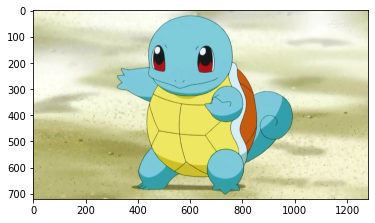

In [3]:
image = cv2.imread("squirtle.webp")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

Averaging Kernel

In [4]:
kernel = np.ones((5, 5), np.float32) / 25
kernel

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]], dtype=float32)

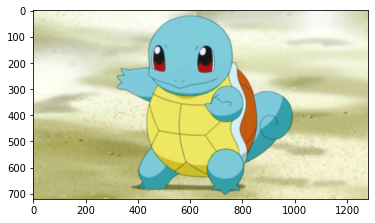

In [5]:
avg_img = cv2.filter2D(image, -1, kernel)
plt.imshow(avg_img)

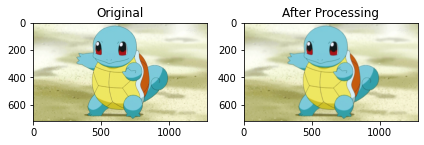

In [6]:
compare_image(image, avg_img)

**Blurring**

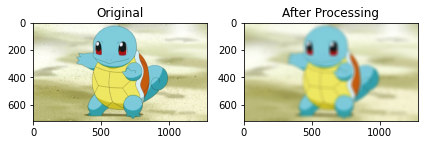

In [7]:
default_blur = cv2.blur(image, (30, 30))
compare_image(image, default_blur)

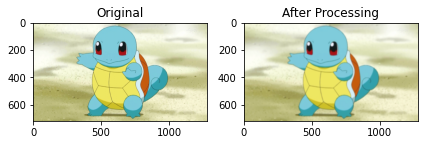

In [8]:
gaussian_blur = cv2.GaussianBlur(image, (15, 15), 0)
compare_image(image, gaussian_blur)

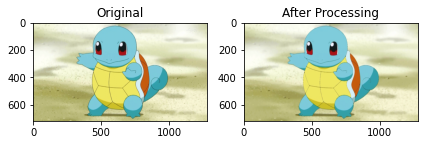

In [9]:
median_blur = cv2.medianBlur(image, 5)
compare_image(image, median_blur)

**Cropping**

In [31]:
cropped_image = image[100:400, 500:800]
compare_image(image, cropped_image)

**Flipping**

In [13]:
cap = cv2.VideoCapture(0)

while True:
    _, frame = cap.read()
    
    frame = cv2.flip(frame, -1)
    
    # 0 - Y Axis
    # 1 - X Axis
    # -1 - Z Axis
    
    cv2.imshow("Hi :D", frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

**Rotating**

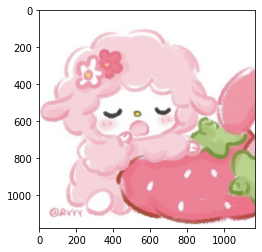

In [15]:
image = cv2.imread('IMG_6687.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [17]:
def rotate_image(img, angle, rotation_point=None):
    height, width = img.shape[:2]
    
    if rotation_point is None:
        rotation_point = (width // 2, height // 2)
        
    rotation_matrix = cv2.getRotationMatrix2D(rotation_point, angle, scale = 1.0)
    dimensions = (width, height)
    
    return cv2.warpAffine(img, rotation_matrix, dimensions)

rotated_image = rotate_image(image, 45, rotation_point=(50, 50))
cv2.imshow('Rotated Image', rotated_image)
cv2.waitKey(5)
cv2.destroyAllWindows()